In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
# plots style presets
import mpl_config
import rf_functions as rf
coil_data = rf.load_inductors()
import os
current_dir = os.getcwd()
# save_path = os.path.join(current_dir, '..', 'thesis', 'figures', 'vna_plots')

# Tadanki Double Res continues parameter value Optimization

## Define objective function to minimize ('Loss Function')

In [ ]:
# objective function -> should be zero for perfect parameters
def objective(params, w1, w2, Z0=50):
    # unpack parameters:
    C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2 = params
    
    # evaluate complex total impedance at w1 and w2
    Z1 = rf.Tadanki(w1, C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2)
    Z2 = rf.Tadanki(w2, C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2)
    
    # real part error = offset to Z0 (matching)
    real_error = (Z1.real - Z0)**2 + (Z2.real - Z0)**2
    
    # imaginary part error = offset to 0 (tuning)
    imag_error = Z1.imag**2 + Z2.imag**2
    
    return real_error + imag_error

## Define bounds to find parameters in

In [3]:
# bounds for parameters to match available components
bounds = [
    (1e-12, 1e-9),  # C_Mhf
    (1e-12, 1e-9),  # C_Mlf
    (1e-12, 1e-9),  # C_Thf
    (1e-12, 1e-9),  # C_Tlf
    (2e-9, 500e-9), # L_t1
    (1e-3, 90e-3),  # R_t1
    (1e-12, 1e-9),  # C_t1
    (2e-9, 500e-9), # L_t2
    (1e-3, 90e-3),  # R_t2
    (1e-12, 1e-9)   # C_t2
]

# Run differential_evolution

In [ ]:
# frequencies of interest 
w1 = 2 * np.pi * 5.694e6  
w2 = 2 * np.pi * 21.527e6  

result = differential_evolution(objective, bounds, args=(w1, w2, 50), tol=1e-9, maxiter=1000)

print('Optimized params:', result.x)
print('Objective function value:', result.fun)

Optimized params: [4.40662023e-10 1.83838424e-10 9.99999826e-10 9.99999691e-10
 5.62613340e-08 8.99743944e-02 8.37790022e-10 4.99999988e-07
 8.99998365e-02 9.99999952e-10]
Objective function value: 2205.0566010834536


# Plot results

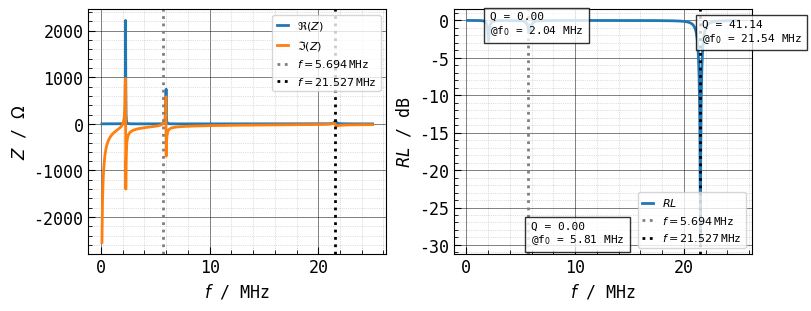

In [ ]:
# results from the code above
C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2 = result.x
# C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2 = 4.07885019e-10, 2.16698122e-10, 9.99998805e-10, 9.99998991e-10, 4.77044647e-08, 8.99344654e-02, 9.98670625e-10, 4.99999997e-07, 8.99994730e-02, 9.99999722e-10
f = np.linspace(1e5,25e6,1000)
w = 2*np.pi*f
f_Na = 5.694
f_H = 21.527
Z = rf.Tadanki(w, C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2)
fig, ax = rf.visualize_Z_RL(f,Z)

# plt.savefig(save_path + '/Tadanki_opt_val_continues_Z_and_RL.pdf', bbox_inches='tight')

## Repeat with discrete values for R and L for available Inductors

# Plot results

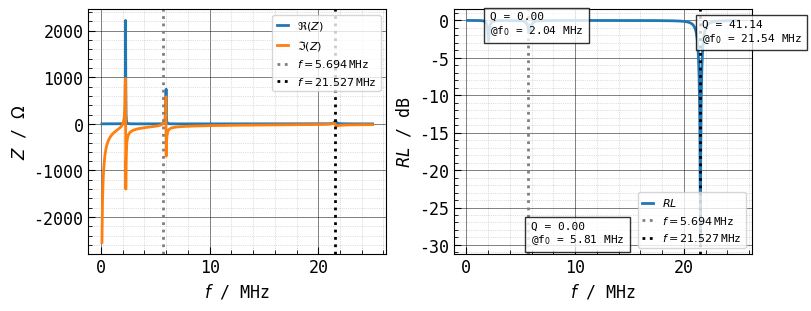

In [ ]:
# results from the code above
C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2 = best_params_full
# C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2 = 4.07885019e-10, 2.16698122e-10, 9.99998805e-10, 9.99998991e-10, 4.77044647e-08, 8.99344654e-02, 9.98670625e-10, 4.99999997e-07, 8.99994730e-02, 9.99999722e-10
f = np.linspace(1e5,25e6,1000)
w = 2*np.pi*f
f_Na = 5.694
f_H = 21.527
Z = rf.Tadanki(w, C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2)
fig, ax = rf.visualize_Z_RL(f,Z)

# plt.savefig(save_path + '/Tadanki_opt_val_continues_Z_and_RL.pdf', bbox_inches='tight')

## Repeat with discrete values for R and L for available Inductors

In [ ]:
# runtime approx. 8 min 

# resonant frequencies of interest
# match Larmor frequency of 23Na and 1H
# calculation of angular frequencies
f1 = 5.694e6
f2 = 21.527e6
w1 = 2 * np.pi * f1
w2 = 2 * np.pi * f2

# the function load_inductors() extracts data of available air core inductors from a .csv file
# the .csv file contains a list of inductances in nH in column 1 and
# a list of resistances in mOhm of the inductor listed in the same row
coil_data = rf.load_inductors()
# allowed L_t and R_t values from coil_data
L_t = 1e-9*coil_data[1:,0]
R_t = 1e-3*coil_data[1:,1]

# objective function
def objective(params, w1, w2, target_real=50):
    C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2 = params
    Z1 = rf.Tadanki(w1, C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2)
    Z2 = rf.Tadanki(w2, C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2)
    real_error = (Z1.real - target_real)**2 + (Z2.real - target_real)**2
    imag_error = Z1.imag**2 + Z2.imag**2
    return real_error + imag_error

# helper variables to compare current optimization result in the iteration to the best optimization result 
# (best = lowest objective function values)
best_loss = np.inf
best_params = None

# loop for tank circuit 1
# enumerate iterates over the list of inductances L_t and 
# extracts the index to find the matching resistance in the list R_t
for i1, L1 in enumerate(L_t):
    # loop for tank circuit 2
    for i2, L2 in enumerate(L_t):
        R1 = R_t[i1]
        R2 = R_t[i2]
        # devides the objective function in fixed values by the current loop iteration and values to optimize
        def obj_fixed(params_cont):
            full_params = [
                *params_cont[0:4],  # C_Mhf, C_Mlf, C_Thf, C_Tlf
                L1, R1,
                params_cont[4],     # C_t1
                L2, R2,
                params_cont[5],     # C_t2
            ]
            return objective(full_params, w1, w2, 50)
        # bounds of the params to optimize
        bounds_cont = [
            (1e-12, 1e-9),  # C_Mhf
            (1e-12, 1e-9),  # C_Mlf
            (1e-12, 1e-9),  # C_Thf
            (1e-12, 1e-9),  # C_Tlf
            (1e-12, 1e-9),  # C_t1
            (1e-12, 1e-9),  # C_t2
        ]
        # run the optimization
        result = differential_evolution(obj_fixed, bounds_cont, disp=False)
        # save best optimization results throughout the iterations of the loops
        if result.fun < best_loss:
            best_loss = result.fun
            best_params = result.x
            # full list of params
            best_params_full = [
                *best_params[0:4], L1, R1,
                best_params[4], L2, R2,
                best_params[5]
            ]

print("Best parameter set:")
print(best_params_full)
print("Best loss:", best_loss)

Best parameter set:
[np.float64(9.956182340547638e-10), np.float64(8.728198391630783e-10), np.float64(4.734245817628818e-10), np.float64(1.531313523318183e-11), np.float64(5.380000000000001e-07), np.float64(0.09), np.float64(9.58528411804956e-10), np.float64(4.2200000000000005e-07), np.float64(0.06), np.float64(1.1466078815026042e-10)]
Best loss: 1.0600536139517187e-23


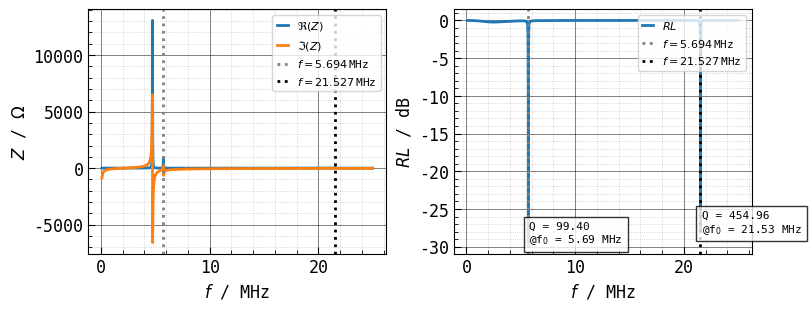

In [ ]:
# C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2 = np.float64(9.252090403097636e-10), np.float64(8.038692448188712e-10), np.float64(4.731189549096005e-10), np.float64(1.612727406079544e-11), np.float64(5.380000000000001e-07), np.float64(0.09), np.float64(9.938806573842995e-10), np.float64(3.0700000000000004e-07), np.float64(0.035), np.float64(1.624143072321521e-10)
C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2 = best_params_full
f = np.linspace(1e5,25e6,10000)
w = 2*np.pi*f
Z = rf.Tadanki(w, C_Mhf, C_Mlf, C_Thf, C_Tlf, L_t1, R_t1, C_t1, L_t2, R_t2, C_t2)
fig, ax = rf.visualize_Z_RL(f, Z)
ax[1].legend(loc='upper right')
# plt.savefig(save_path + '/Tadanki_opt_val_discrete_Z_and_RL.pdf', bbox_inches='tight')

## Repeat with circuit presented in Schnall 1985

In [9]:
# L and R values in interval
def objective(params, w1, w2, target_real=50):
    C_1, C_2, C_3, L_1, R_1, L_3, R_3 = params
    Z1 = rf.Schnall(w1, C_1, C_2, C_3, L_1, R_1, L_3, R_3)
    Z2 = rf.Schnall(w2, C_1, C_2, C_3, L_1, R_1, L_3, R_3)
    real_error = (Z1.real - target_real)**2 + (Z2.real - target_real)**2
    imag_error = Z1.imag**2 + Z2.imag**2
    return real_error + imag_error

bounds = [
    (1e-12, 1e-7),      # C_1
    (1e-12, 1e-7),      # C_2
    (1e-12, 1e-7),      # C_3
    (2e-9, 500e-9),     # L_1
    (1e-3, 90e-3),      # R_1
    (2e-9, 500e-9),     # L_3
    (1e-3, 90e-3),      # R_3
]

w1 = 2 * np.pi * 5.694e6 
w2 = 2 * np.pi * 21.527e6  

result = differential_evolution(objective, bounds, args=(w1, w2, 50), tol=1e-9, maxiter=1000)

print("Optimized params:", result.x)
print("Objective function value:", result.fun)

Optimized params: [6.94328731e-08 9.57037952e-08 4.54742067e-08 4.19377359e-07
 5.53648142e-02 1.73084511e-08 7.65888528e-03]
Objective function value: 2500.0262858482934


## Discrete R and L values

In [10]:
# runtime around 6 min
# R and L values discrete
# Schnall
f1 = 5.694e6
f2 = 21.527e6
w1 = 2 * np.pi * f1
w2 = 2 * np.pi * f2

L_t = 1e-9*coil_data[1:,0]
R_t = 1e-3*coil_data[1:,1]

def objective(params, w1, w2, target_real=50):
    C_1, C_2, C_3, L_1, R_1, L_3, R_3 = params
    Z1 = rf.Schnall(w1, C_1, C_2, C_3, L_1, R_1, L_3, R_3)
    Z2 = rf.Schnall(w2, C_1, C_2, C_3, L_1, R_1, L_3, R_3)
    real_error = (Z1.real - target_real)**2 + (Z2.real - target_real)**2
    imag_error = Z1.imag**2 + (Z2.imag)**2
    return real_error + 50*imag_error

best_loss = np.inf
best_params = None

for i1, L_1 in enumerate(L_t):
    for i3, L_3 in enumerate(L_t):
        R_1 = R_t[i1]
        R_3 = R_t[i3]

        def obj_fixed(params_cont):
            full_params = [
                *params_cont[0:3],   
                L_1, R_1, L_3, R_3
            ]
            return objective(full_params, w1, w2, 50)

        bounds_cont = [
            (1e-12, 1e-9),  
            (1e-12, 1e-9),  
            (1e-12, 1e-9),  
        ]

        result = differential_evolution(obj_fixed, bounds_cont, disp=False)

        if result.fun < best_loss:
            best_loss = result.fun
            best_params = result.x
            best_params_full = [
                *best_params[0:3],   
                L_1, R_1, L_3, R_3
            ]

print("Best parameter set:")
print(best_params_full)
print("Best loss:", best_loss)

Best parameter set:
[np.float64(8.278644294980839e-10), np.float64(3.1680245257019444e-10), np.float64(2.999914122880585e-10), np.float64(6.8e-08), np.float64(0.008199999999999999), np.float64(9.000000000000001e-08), np.float64(0.015)]
Best loss: 0.7723307605938425


## Plots both results

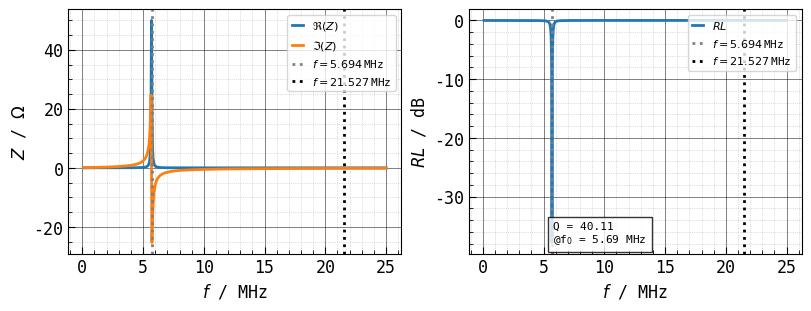

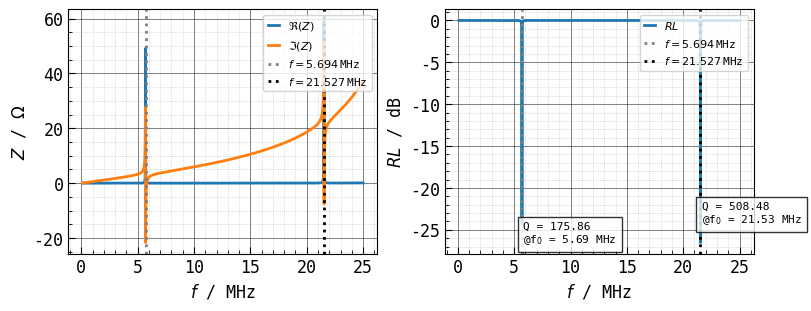

In [ ]:
# Schnall

f = np.linspace(1e5,25e6,10000)
w = 2*np.pi*f

C_1, C_2, C_3, L_1, R_1, L_3, R_3 = 6.94328731e-08, 9.57037952e-08, 4.54742067e-08, 4.19377359e-07, 5.53648142e-02, 1.73084511e-08, 7.65888528e-03
Z =  rf.Schnall(w, C_1, C_2, C_3, L_1, R_1, L_3, R_3)
fig, ax = rf.visualize_Z_RL(f,Z)
# plt.savefig(save_path + '/Schnall_opt_val_continues_Z_and_RL.pdf', bbox_inches='tight')

# with discrete values
C_1, C_2, C_3, L_1, R_1, L_3, R_3 = np.float64(8.278644294980839e-10), np.float64(3.1680245257019444e-10), np.float64(2.999914122880585e-10), np.float64(6.8e-08), np.float64(0.008199999999999999), np.float64(9.000000000000001e-08), np.float64(0.015)
Z =  rf.Schnall(w, C_1, C_2, C_3, L_1, R_1, L_3, R_3)
fig, ax = rf.visualize_Z_RL(f,Z)
# plt.savefig(save_path + '/Schnall_opt_val_discrete_Z_and_RL.pdf', bbox_inches='tight')
